In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x0, x1, y = np.loadtxt("ex2data2.txt", dtype=np.float32, comments="#", delimiter=",", unpack=True)

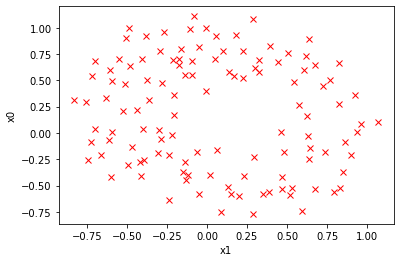

In [3]:
plt.plot(x0, x1, 'rx')
plt.ylabel('x0')
plt.xlabel('x1')
plt.show()

In [4]:
m = len(y)
theta = np.zeros(28, dtype=np.float32)
iterations = 1500
alpha = 0.01


In [7]:
X = np.ones(m)[:, np.newaxis]
for i in range(1, 7):
    for j in range(i+1):
        X = np.hstack((X, np.multiply(np.power(x0, i-j), np.power(x1, j))[:, np.newaxis]))    
X.shape

(118, 28)

In [8]:
def cost_function(X, y, theta):
    h = 1/(1 + np.exp(-X.dot(theta)))
    cost_1 = np.log(h)
    cost_2 = np.array([np.log(1-i) for i in h])
    summ = y.dot(cost_1) + np.array([1-i for i in y]).dot(cost_2)
    return -summ/m

In [9]:
print(cost_function(X, y, theta))

0.6931471805599453


In [125]:
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)
for i in range(iterations):    
    temp = [0 for _ in range(28)]
    for j in range(28):
        h = 1/(1 + np.exp(-X.dot(theta)))
        if j == 0:
            l = 0
        else:
            l = 0.1
        temp[j] = theta[j] - ((alpha/m) * np.sum((h-y) * np.array(X[:, j]))) - theta[j]*alpha*l/m
    theta = temp
    j_history[i] = cost_function(X, y, theta)

In [126]:
print(theta)

[1.6063092708160271, 0.9333993034499881, 1.6488677421611961, -2.627263499280685, -1.3592051748726717, -1.8599282619767945, 0.24423751613795966, -0.5455239728530499, -0.5174060805660324, -0.19860328593917997, -1.965491661309617, -0.08980715370697875, -0.8550347432143777, -0.4253159624811011, -1.610637009075215, -0.2984713644485361, -0.3072131982794255, -0.05787074471487132, -0.3997533614324196, -0.443504522136433, -0.5953086199306414, -1.4290644138797064, 0.029441899863362715, -0.40834037557725567, 0.015031086676065085, -0.4615129184148737, -0.2341448663223125, -1.2577058810706998]


In [134]:
p = [1/(1 + np.exp(-X.dot(theta))) >= 0.5]
print(np.mean(p==y)*100)

81.35593220338984


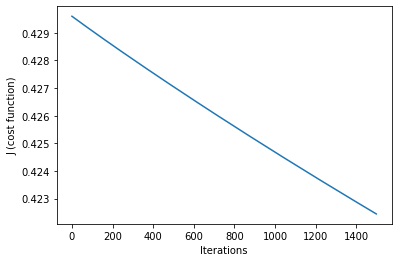

In [128]:
plt.plot(np.arange(0, iterations), j_history)
plt.ylabel('J (cost function)')
plt.xlabel('Iterations')
plt.show()

In [ ]:
X.dot()